## This is a code that implements Nick's Fourier Transform to get the Kernel Function for the Barrier:

In [1]:
from scipy.special import kv as kv # Import Bessel Function
from scipy.integrate import quad # Import function to do the integral
from scipy.special import erfc
from time import time

import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [11]:
# Some Global Constants:
# Integration Boundary:
int_bount= 100

In [2]:
def integrand_ss(Y, y, x1, x2, b):
    '''y is the distance between y1 and y2; x1 and x2 are x coordinates. 
    b is strength of the barrier.'''
    c1 = b * np.cos(y*Y) / (2 + b * np.sqrt(1+Y**2)) 
    c2 = np.exp(-np.abs(x1+x2) * np.sqrt(1 + Y**2))
    return c1*c2

def integrand_ss1(Y, y, x1, x2, b):
    '''Integrand for samples on the same side; but includes Terms for 
    Bessel Decay'''
    c1 = b * np.cos(y*Y) / (2 + b * np.sqrt(1 + Y**2)) # The part for the reflection
    c2 = np.exp(-np.abs(x1+x2) * np.sqrt(1 + Y**2))
    
    c3 = np.cos(y*Y) / np.sqrt(1 + Y**2)  # These Terms will give Bessel Decay
    c4 = np.exp(-(np.abs(x1-x2)+0.000000) * np.sqrt(1+Y**2)) # To force decay: 0.0001
    return (c1*c2 + c3*c4)

def integrand_ds(Y, y, x1, x2, b):
    '''Integrand for sample on different sides of the Barrier'''
    c1 = 2 * np.cos(y*Y) / (np.sqrt(1 + Y**2) * (2 + b*np.sqrt(1 + Y**2)))
    c2 = np.exp(-np.abs(x1-x2) * np.sqrt(1+Y**2))     
    return c1*c2
    
def bessel0(y, x1, x2):
    '''Give the Bessel Part of the decay.'''
    r = np.sqrt((x1-x2)**2 + y**2) # Calculates pairwise Distance
    return kv(0, r)                # Gives the Bessel Decay

<IPython.core.display.Javascript object>


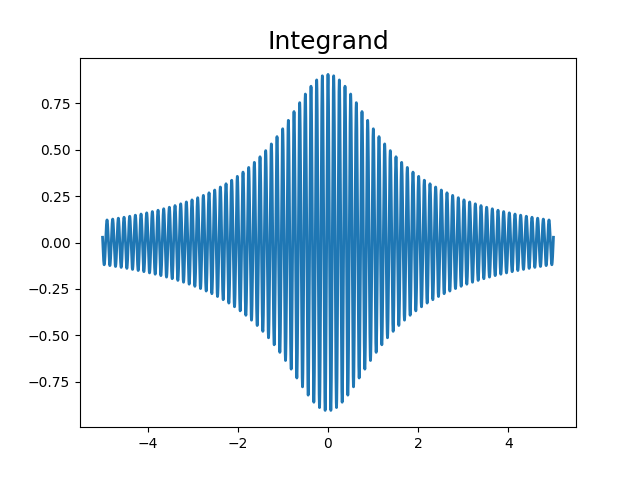

In [18]:
# Plot the Integrand:

plt.figure()
x = np.linspace(-5,5,10000)
x1 = np.linspace(1,1000,100000)
y = integrand_ss1(x, 50, 0.001, 0.1, 0.0)
plt.plot(x,y,linewidth=2)
#plt.plot(x1,1/x1)
#plt.xscale('log')
plt.title("Integrand", fontsize=18)
plt.show()

Wow that is quite the fluctuation! Maybe numerically not very stable...

In [4]:
def full_function(y, x1, x2, b):
    '''Gives the Fourier Transform of the Integrand.
    y is the distance between y1 and y2; x1 and x2 are x coordinates. 
    b is strength of the barrier.'''
    if x1==x2 and y==0:  # In case of identical samples
        return 1.0
    if (x1 <= 0 and x2 <= 0) or (x1 >= 0 and x2 >= 0):  # For same side of Barrier
        return (bessel0(y,x1,x2) + quad(integrand_ss, 
                                      0, np.inf, args=(y, x1, x2, b)))[0]
        

    else: # Different side of Barrier
        return quad(integrand_ds, 
            0, np.inf, args=(y, x1, x2, b))[0]  # 0 to only extract the exact part of the integral
    
def full_function_cut_off(y, x1, x2, b, bound=np.inf):
    '''Give the Fourier Transform of the Integrand;
    but with limited Boundaries for the Integral! Integrate also 
    the term giving bessel-decay'''
    if (x1 <= 0 and x2 <= 0) or (x1 >= 0 and x2 >= 0):  # For same side of Barrier
        return quad(integrand_ss1, 0, bound, args=(y, x1, x2, b))[0]       

    else: # Different side of Barrier
        return quad(integrand_ds, 
            0, bound, args=(y, x1, x2, b))[0]  # 0 to only extract the exact part of the integral

In [15]:
#%timeit full_function(0.1,1,2,0.5)
#print(full_function(0.1, 0.3, 0.4, 0.5))
#%timeit full_function(0.1, 0.3, 0.4, 0.5)
#print(full_function(0.00, -0.01, 0.02, 0.03))
#print(full_function_cut_off(0.00, -0.01, 0.02, 0.03, bound=np.inf))

print(full_function_cut_off(50, 0.011, 0.012, 0.0,bound=100))
print(full_function(50, 0.011, 0.012, 0.0))
print(bessel0(50, 0.011, 0.012))

#%timeit full_function_cut_off(0.1, -0.011, 0.011, 0.1)
#%timeit full_function(0.1, -0.011, 0.011, 0.1)

-0.00340111629715
3.41016771535e-23
3.41016771535e-23


/usr/local/lib/python2.7/dist-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


<IPython.core.display.Javascript object>


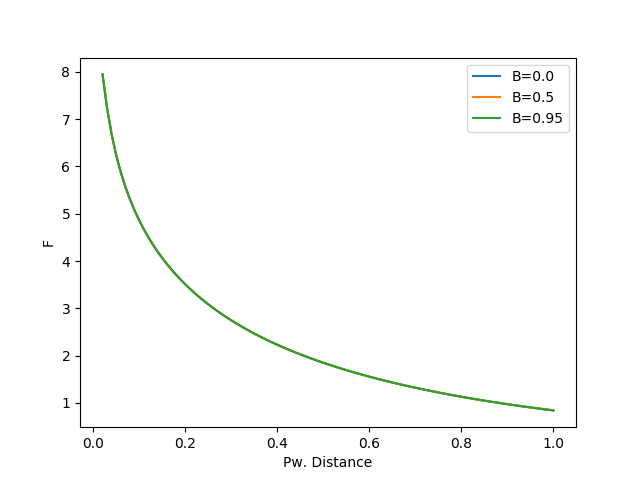

In [5]:
# Okay, now start the plotting action:
x_vec=np.linspace(0.02,1,100)
y = np.array([full_function(0.01, 0.01, x, b=0.0) for x in x_vec])
y1 = np.array([full_function(0.01, 0.01, x, b=0.5) for x in x_vec])
y2 = np.array([full_function(0.01, 0.01, x, b=0.95) for x in x_vec])

yb = np.array([full_function(0.01, -0.01, x, b=0.0) for x in x_vec])
yb1 = np.array([full_function(0.01, -0.01, x, b=0.5) for x in x_vec])
yb2 = np.array([full_function(0.01, -0.01, x, b=0.95) for x in x_vec])

# Do the Plotting
plt.figure()
plt.plot(x_vec, y + yb, label="B=0.0")
plt.plot(x_vec, y1 + yb1, label="B=0.5")
plt.plot(x_vec, y2 + yb2, label="B=0.95")


#plt.plot(x_vec,yb,label="B=0.0")
#plt.plot(x_vec,yb1,label="B=0.5")
#plt.plot(x_vec,yb2,label="B=0.95")

#plt.yscale('log')
plt.xlabel("Pw. Distance")
plt.ylabel("F")
#plt.xscale('log')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


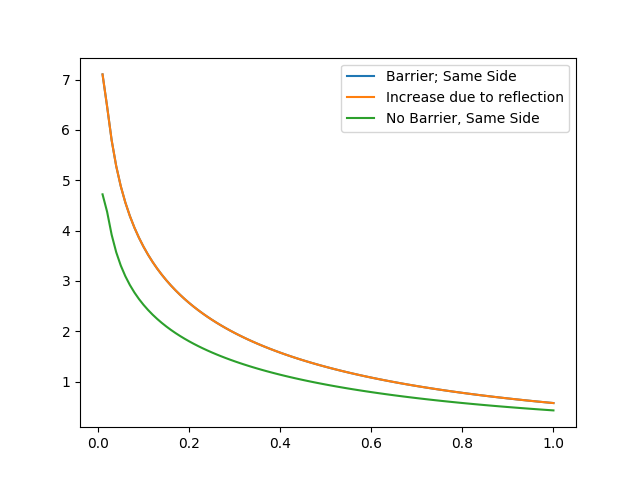

In [6]:
# Some more Sanity Checks:
x_vec=np.linspace(0.01,1,100)

y_no = np.array([full_function(0.01, 0.01, x, b=0) for x in x_vec])     # Samples K0
y_no_r = np.array([full_function(0.01, -0.01, x, b=0) for x in x_vec])   # Reflected Samples K0


y1 = np.array([full_function(0.01, -0.01, x, b=0.8) for x in x_vec])    # 
y2 = np.array([full_function(0.01, 0.01, x, b=0.8) for x in x_vec])     #

plt.figure()
plt.plot(x_vec,y2,label="Barrier; Same Side")
plt.plot(x_vec, y_no + (y_no_r-y1), label="Increase due to reflection")  # Sample plus increase due to what is missing for
plt.plot(x_vec, y_no, label="No Barrier, Same Side")                     #  
plt.legend()
#plt.plot(x_vec, 5*np.exp(-(3*x_vec)))
plt.show()

<IPython.core.display.Javascript object>


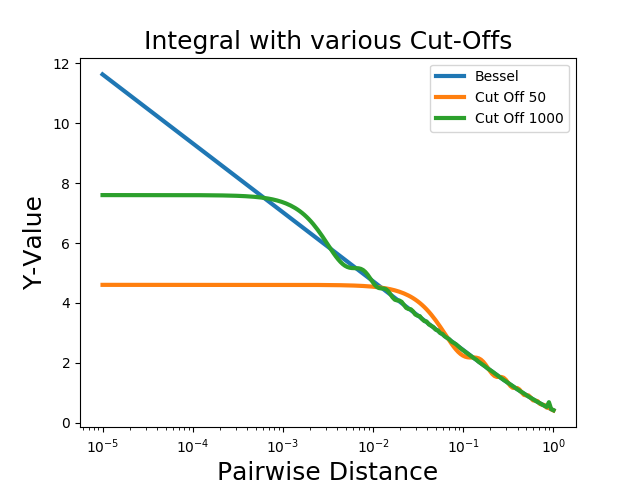

<IPython.core.display.Javascript object>


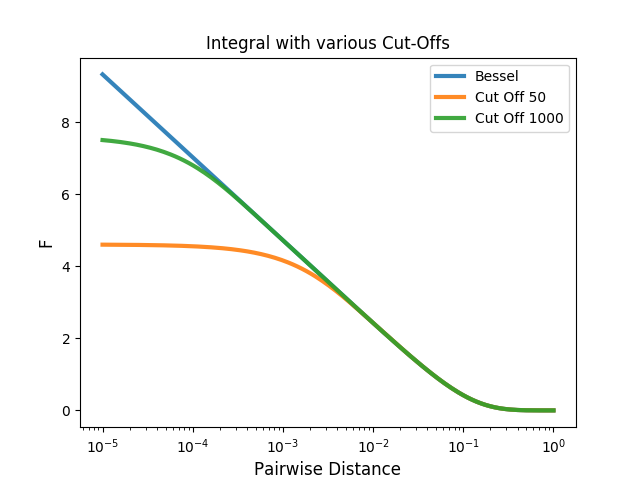

In [15]:
# Make a Plot to check behavior with increasing y:
#y_vec = np.linspace(0.001,1,200)
y_vec = np.logspace(-5, 0, 200)

y0 = bessel0(y_vec, 0.011, 0.011)
y1 = np.array([full_function_cut_off(yd, 0.011, 0.011, b=0, bound = 50) for yd in y_vec])
y2 = np.array([full_function_cut_off(yd, 0.011, 0.011, b=0, bound = 1000) for yd in y_vec])

plt.figure()
plt.plot(y_vec, y0, label="Bessel", linewidth=3)
plt.plot(y_vec, y1, label="Cut Off 50", linewidth=3)
plt.plot(y_vec, y2, label="Cut Off 1000", linewidth=3)
plt.legend()
plt.xscale("log")
plt.title("Integral with various Cut-Offs", fontsize=18)
plt.xlabel("Pairwise Distance", fontsize=18)
plt.ylabel("Y-Value",fontsize=18)
plt.show()

# And now make Plot for the same thing along x-axis
x_vec = np.logspace(-4, 1, 200)

y0 = bessel0(0.0, 0, x_vec)
y1 = np.array([full_function_cut_off(0.0, 0, x2, b=0, bound = 50) for x2 in x_vec])
y2 = np.array([full_function_cut_off(0.0, 0, x2, b=0, bound = 1000) for x2 in x_vec])

plt.figure()
plt.plot(y_vec, y0, label="Bessel",alpha=0.9, linewidth=3)
plt.plot(y_vec, y1, label="Cut Off 50",alpha=0.9, linewidth=3)
plt.plot(y_vec, y2, label="Cut Off 1000",alpha=0.9, linewidth=3)
plt.legend()
plt.xscale("log")
plt.xlabel("Pairwise Distance", fontsize=12)
plt.ylabel("F", fontsize=12)
plt.title("Integral with various Cut-Offs",fontsize=12)
plt.show()

In [19]:
# Code to check whether Integral on different side of the barrier agrees with k0
x_vec = np.linspace(0.011,0.11,1000)
y0 = bessel0(4, 0.011, x_vec) # Only Bessel Function
y1 = np.array([full_function_cut_off(4, 0.011, x, b=0, bound=1000) for x in x_vec])
plt.figure()
plt.plot(x_vec, y0, label="Bessel Function")  # Via the Bessel-function
plt.plot(x_vec, y1, label="Via Integral")  # Via the Integral with b=0
plt.legend()
plt.show()           # Yay they are ident!!!

/usr/local/lib/python2.7/dist-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


KeyboardInterrupt: 

In [ ]:
# Some trial Cells:
def f(x,a):
    return 1.0/x**a

In [ ]:
quad(f, 2, np.inf, args=(3))

In [ ]:
scale_factor = 50.0
X_data = np.loadtxt('./coordinates15.csv', delimiter='$').astype('float64') / scale_factor # Load the complete X-Data
print(X_data[:10])
plt.figure()
plt.scatter(X_data[:500,0],X_data[:500,1])
plt.show()

In [ ]:
def calc_kernel_mat(coords, b, bound):
    # Produce Full Covariance Matrix
    kernel=np.array([[full_function_cut_off(i[1]-j[1], i[0], j[0], b, bound=bound) for i in coords] for j in coords])
    return kernel

print(np.shape(X_data))
kernel=calc_kernel_mat(X_data[:500,:], 0.5, 50)

In [ ]:
print(X_data[0,:])
print(X_data[2,:])
print(full_function_cut_off(4, 0, 0, 0))
print(full_function(4, 0, 0, 0))
print(bessel0(4, 0, 0))

In [ ]:
#np.linalg.eigvals(kernel)
for i in range(np.size(kernel,0)):
    kernel[i,i]=0.3
np.max(kernel)

In [ ]:
kernel[:5,:5]

In [ ]:
a=np.linalg.eigvals(kernel+0.0001*np.eye(len(kernel[:,0])))
a

In [ ]:
np.max(kernel)

In [ ]:
# Bessel Kernel
# Quickly calculate a Bessel Kernel:
def calc_kernel_mat(coords):
    # Produce Full Covariance Matrix
    kernel=np.array([[bessel0(i[1]-j[1], i[0], j[0]) for i in coords] for j in coords])
    return kernel

X_data = np.loadtxt('./coordinates15.csv', delimiter='$').astype('float64') # Load the complete X-Data

print(np.size(X_data,0))

kernel=calc_kernel_mat(X_data)

## And now play around with numerical Integration and compare to Bessel Function!

In [ ]:
def integrand_nobarrier(t, r, sigma, mu):
    '''The integrand in case there is no barrier'''
    diff=1/(4*np.pi*t) * np.exp(-(r**2)/(4*sigma**2 * t)) # Diffusion
    ld_migration=np.exp(-t*2*mu)      # Long Distance Migration
    return diff * ld_migration
    

def num_integral(initial_sep, t0, sigma, mu):
    '''Function that calculates numerically what the identity 
    due to shared ancestry should be.'''    
    return quad(integrand_nobarrier, 
        t0, np.inf, args=(initial_sep, sigma, mu))[0]  # 0 to only extract the exact part of the integral

In [ ]:
%timeit num_integral(20, t0=1, sigma=1, mu=0.5)

Now do some Plotting action:
Compare numerical Integrals to Bessel Function:

In [ ]:
sigma = 1
mu = 0.001

x_vec=np.logspace(-0.5,2,100)
y_vec01=np.array([num_integral(x, t0=0.1,sigma=sigma,mu=mu) for x in x_vec])
y_vec1=np.array([num_integral(x, t0=1, sigma=sigma, mu=mu) for x in x_vec])
y_vec20=np.array([num_integral(x, t0=2, sigma=sigma, mu=mu) for x in x_vec])

y_bessel=1/(2*np.pi)*kv(0, np.sqrt(2*mu)*x_vec)   # The numerical Result from Mathematica


plt.figure(figsize=(8,8))
plt.plot(x_vec, y_vec01,label="Numerical Integral from t0=0.1")
plt.plot(x_vec, y_vec1, label="Numerical Integral from t0=1")
plt.plot(x_vec, y_vec20, label="Numerical Integral from t0=5")
plt.plot(x_vec, y_bessel, label="Bessel Decay K0")
plt.xscale("log")
plt.legend()
plt.show()

One can clearly see that there are different regimes:
-  The constant regime (determined by t0)
-  The logarithmic regime (determined by whats in the Bessel)
- The exponential regime 

Now lets see if that's positive definite (it kind of should be the way it is constructed...)

In [ ]:
coords = np.array([[0.1*i, 0.1*j] for i in xrange(10) for j in xrange(10)])

dist_mat = np.sqrt(np.sum((coords[:, None] - coords[None, :])** 2,axis=2))


plt.figure()
plt.scatter(coords[:,0], coords[:,1])
plt.show()

In [ ]:
num_integral_v=np.vectorize(num_integral)  # Vectorizes the integral
kernel1 = num_integral_v(dist_mat, t0=0.1, sigma=sigma, mu=mu) # Calculate the kernel via vectorized function

In [ ]:
a=np.linalg.eigvals(kernel1+0.000001*np.eye(len(kernel1[:,0])))
a

## Result: 
So this new Kernel is positive definte! 
uhhh YAAAAAAY

So now go to the hard part and make it for the whole barrier - lets see what this brings!

In worst case one could fall back to that!

In [ ]:
class Kernel_calc(object):
    '''A whole class which is designed to 
    calculate covariance kernels from the Barrier Diffusion Model
    Throughout y is the STARTING point and x the end point'''
    # Parameters of the Covariance
    k = 0.5    # Permeability
    D = 1.0    # Diffusion Constant; equals sigma**2. Sets how quickly stuff decays
    mu = 0.001      # Long Distance/Migration rate; sets the absolute scale of identity
    t0 = 1     # Starting Point of Integration; i.e. where to start integration
    
    def __init__(self, k=0.5, D=1, t0=1.0, mu=0.001):
        '''Initialize to set desired values!'''
        self.k = k   # Sets the constaints to their required values
        self.D = D
        self.t0 = t0
        self.mu=mu
    
    def GS(self, t, y, x):
        '''1D Diffusion for same side of the Barrier'''
        n1 = np.exp(-(x-y)**2/(4*self.D*t)) + np.exp(-(x+y)**2/(4*self.D*t))
        d1 = np.sqrt(4*np.pi*self.D*t)
        
        a2 = self.k/self.D * np.exp(2*self.k/self.D * (y+x+2*self.k*t))
        b2 = erfc((y+x+4*self.k*t)/(2*np.sqrt(self.D*t)))
        res=n1/d1 - a2*b2
        if np.isnan(res) or np.isinf(res):    # Check if numerical instability
            return self.gaussian(t,y,x) # Fall back to Gaussian (to which one converges)
        else: return res

    def GD(self, t, y, x):
        '''1D Diffusion for different sides of the Barrier'''
        a1=self.k/self.D*np.exp(2*self.k/self.D * (y-x+2*self.k*t))
        b1=erfc((y-x+4*self.k*t)/(2*np.sqrt(self.D*t)))
        res= a1*b1
        if np.isnan(res) or np.isinf(res):    # Check if numerical instability
            return self.gaussian(t,y,x) # Fall back to Gaussian (to which one converges)
        else: return res

    def gaussian(self, t, y, x):
        '''The normal thing without a barrier'''
        return np.exp(-(x-y)**2/(4*self.D*t)) / np.sqrt(4*np.pi*self.D*t)

    def gaussian1d(self, t, dy):
        '''The One Dimensional Gaussian. 
        Differnce: Here dy notes the difference along the y axis'''
        return 1.0/np.sqrt(4*np.pi*self.D*t) * np.exp(- dy**2 /(4*self.D*t))


    def integrand_barrier_ss(self, t, dy, x0, x1):
        '''The integrand in case there is no barrier
        Product of 1d Gaussian along y-Axis and x-Axis Barrier Pdf.
        And a term for the long-distance migration'''
        return (self.gaussian1d(t, dy) * self.GS(t, x0, x1) * np.exp(-2*self.mu*t))

    def integrand_barrier_ds(self, t, dy, x0, x1):
        '''the integrand for cases of different sided of the barrier.
        Product of 1d Gaussian along y-Axis
        And a term for the long-distance migration'''
        return (self.gaussian1d(t, dy) * self.GD(t,x0, x1) * np.exp(-2*self.mu*t))
        

    def num_integral_barrier(self, dy, x0, x1):
        '''Calculate numerically what the identity 
        due to shared ancestry should be. 
        dy: Difference along y-Axis
        x0: Starting point on x-Axis 
        x1: Ending point on x-Axis
        Integrate from t0 to Infinity'''  
        if x0<0:   # Formulas are only valid for x0>0; but simply flip at barrier if otherwise!
            x0=-x0
            x1=-x1
        
        if x1>0:  # Same side of Barrier
            return quad(self.integrand_barrier_ss, 
                self.t0, np.inf, args=(dy, x0, x1))[0] 
        
        if x1<0: # Different side of Barrier
            return quad(self.integrand_barrier_ds,
                self.t0, np.inf, args=(dy, x0, x1))[0]
        
    def calc_kernel_mat(self, coords):
        '''Given List of Coordinates; calculate the full covariance Kernel'''
        kernel_mat = [[self.num_integral_barrier(i[1]-j[1], 
                            i[0], j[0]) for i in coords] for j in coords]
        return np.array(kernel_mat)

In [ ]:
# Some Timing action:
k = 0.1
D = 5.0
kc= Kernel_calc(k,D,t0=1.0,mu=0.01)
%timeit kc.GS(500,10.0,20)
%timeit kc.integrand_barrier_ss(100, 10.0, 10, 20)

In [ ]:
# Test out the PDF of a 1D random walk with barrier

k = 0.01
D = 5.0
t= 50
kc = Kernel_calc(k,D)

x_vec=np.linspace(0,100,1000)
x_vec_refl=np.linspace(-100,0,1000)
x_vec_gaussian=np.linspace(-100,100,1000)

y=np.array([kc.GS(t, 10.0, x) for x in x_vec])                #t ,x, y
y_refl=np.array([kc.GD(t, 10.0, x) for x in x_vec_refl])
y_gaussian=np.array([kc.gaussian(t, 10.0, x) for x in x_vec_gaussian])



plt.figure()
plt.plot(x_vec_refl, y_refl, label="Diff. Side of Barrier")
plt.plot(x_vec, y, label="Same Side")
plt.plot(x_vec_gaussian, y_gaussian, label="Normal PDF")
plt.axvline(x=0.0,c="red", linewidth=2, label="Barrier")

plt.legend()
plt.show()

In [ ]:
# Do some more Plots to see how the Integrand behaves:
k = 0.1
D = 1.0
mu = 0.001
t0 = 1

kc = Kernel_calc(k, D, t0=t0, mu=mu)

t_vec= np.linspace(1,3000,5000)

yd=[kc.integrand_barrier_ds(t, 10.0, 10, -10) for t in t_vec]
ys=[kc.integrand_barrier_ss(t, 10.0, 10, 30) for t in t_vec]


plt.figure()
plt.plot(t_vec, yd, label="Different Side; Separation 20/10")
plt.plot(t_vec, ys, label="Same Side; Separatin 20/10")
#plt.yscale("log")
plt.legend()
plt.show()

In [ ]:
# Now finally go to the Integrand:
k = 0.01
D, sigma = 1.0, 1.0
mu = 0.001
t0 = 5.0


kc = Kernel_calc(k, D, t0=t0, mu=mu)
#%timeit kc.num_integral_barrier(5,10,20)

x_vec=np.logspace(-0.1,2.0,100)+2
y_vec= [kc.num_integral_barrier(0, -1, -1 + x1) for x1 in x_vec] # 0 Difference along the y-Axis ; 

#kc = Kernel_calc(k, D, t0=0.5, mu=mu)
y_vec2= [kc.num_integral_barrier(0, 1, 1 + x1) for x1 in x_vec] # 0 Difference along the y-Axis ; 
 

y_vec01=np.array([num_integral(x, t0=1.0, sigma=sigma, mu=mu) for x in x_vec]) # Numerical decay for Gaussian
#y_vec1=np.array([num_integral(x, t0=1, sigma=sigma, mu=mu) for x in x_vec])
#y_vec20=np.array([num_integral(x, t0=2, sigma=sigma, mu=mu) for x in x_vec])

y_bessel=1/(2*np.pi)*kv(0, np.sqrt(2*mu) * x_vec)   # The numerical Result from Mathematica


plt.figure(figsize=(8,8))
#plt.plot(x_vec, y_vec01, label="Numerical Integral no barrier")
plt.plot(x_vec, y_bessel, alpha=0.8, label="Bessel Decay K0")
plt.plot(x_vec,y_vec, alpha=0.8, label="Num. Integral DS")
plt.plot(x_vec,y_vec2, alpha=0.8, label="Num. Integral SS")

plt.xscale("log")
#plt.yscale("log")
plt.legend()
plt.show()

Test the Barrier Kernel for positive definiteness:

In [ ]:
k=0.01
D=1
t0=1
mu=0.001
kc = Kernel_calc(k, D, t0=t0, mu=mu)

coords=np.array([[i,j] for i in xrange(-5,6,2) for j in xrange(-5,6,2)])

plt.figure()
plt.scatter(coords[:,0],coords[:,1])
plt.show()

kernel=kc.calc_kernel_mat(coords) # Calculates Kernel - remember a single integral takes ~0.03s.

In [ ]:
a=np.linalg.eigvals(kernel+0.000001*np.eye(len(kernel[:,0])))
print(np.min(a))

In [ ]:
# Plot the kernel:
plt.figure()
plt.plot(kernel[0,:6], label="Same Side")
plt.plot(kernel[0,::6],label="Different Sides")
plt.legend()
plt.show()

In [ ]:
# Draw from this covariance matrix to show whats goint on
data = np.random.multivariate_normal(np.zeros(len(kernel)), kernel)  # Do the random draws of the deviations from the mean

plt.figure()
plt.scatter(coords[:,0], coords[:,1], c=data, s=1000)
plt.show()